<a href="https://colab.research.google.com/github/flying-bear/2018-course-poster/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Это отчёт по нашему [проекту](https://github.com/AnnaZhuravleva/avtobreja)**

## **0. участники**
- [Аня Журавлёва](https://github.com/AnnaZhuravleva)
- [Лера Морозова](https://github.com/leramorozova)
- [Галя Рязанская](https://github.com/flying-bear/)
- [Ася Сидорова](https://github.com/SerasLain)



[Реферат](https://github.com/AnnaZhuravleva/avtobreja/blob/master/referat.pdf) в основном писала Ася (немножко Галя).

[Ручную разметку](https://github.com/AnnaZhuravleva/avtobreja/tree/master/group_0) для задания 2 делала Галя.

Отчёт в основном писала Галя (немножко Ася).

## **1. описание использованных материалов**

### **1.1. тренировочный корпус** (Галя)
Тренировочный корпус был у всех групп один, он состоял из 19034 текстов отзывов на рестораны и соответствующих им оценок еды, сервиса и интерьера по шкале от 0 до 10. В текстовом корпусе было 40.41 млн токенов (0.11 млн уникальных лемм по разметке UDPipe).

In [0]:
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd

from collections import Counter
from scipy.stats import normaltest, wilcoxon

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
lemmatized = pd.read_csv("/content/drive/My Drive/studies/HSE/prog/nlp/proj/SentiRuEval_rest_train_lemma_POS.csv", index_col=0)
lemmatized.tail()

,food,service,text,lemma_POS
19029,2,3,"С тех пор, как побывала последний раз, мнение ...","с_ADP тот_DET пора_NOUN ,_PUNCT как_SCONJ быва..."
19030,1,1,Обнаруженный в салате таракан очень поразил!!!...,обнаружить_VERB в_ADP салат_NOUN таракан_NOUN ...
19031,6,5,Забавное заведение. Симпатичный светлый интерь...,забавный_ADJ заведение_NOUN ._PUNCT симпатичны...
19032,8,9,Поздравляем администрацию ресторана Навруз с Н...,поздравлять_VERB администрация_NOUN ресторан_N...
19033,8,8,Очень нравиться интерьер. Отличный гриль.Карта...,очень_ADV нравиться_VERB интерьер_NOUN ._PUNCT...


In [4]:
flatten = lambda l: [item for sublist in l for item in sublist]
tokens = sum(lemmatized["lemma_POS"].apply(len))
unique = len(set(flatten(list(lemmatized["lemma_POS"].apply(lambda s: s.split())))))
print(f"number of tokens in the corpus: {tokens}\nnumber of unique UDPipe-lemmas in the corpus: {unique}")

number of tokens in the corpus: 40416082
number of unique UDPipe-lemmas in the corpus: 111534


Немного о распределении оценок в корпусе:


In [5]:
mean_food, mean_service = lemmatized.drop(["text", "lemma_POS"], axis=1).mean(axis=0)
print(f"mean food score: {mean_food:.2f}\nmean service score: {mean_service:.2f}")

mean food score: 7.14
mean service score: 6.99


In [6]:
median_food, median_service = lemmatized.drop(["text", "lemma_POS"], axis=1).median(axis=0)
print(f"median food score: {median_food}\nmedian service score: {median_service}")

median food score: 8.0
median service score: 8.0


In [7]:
mode_food, mode_service = lemmatized.drop(["text", "lemma_POS"], axis=1).mode(axis=0).iloc[0]
print(f"mode food score: {mode_food}\nmode service score: {mode_service}")

mode food score: 10
mode service score: 10


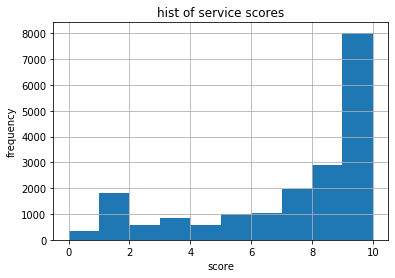

In [8]:
lemmatized["service"].hist()
plt.xlabel("score")
plt.ylabel("frequency")
plt.title("hist of service scores");

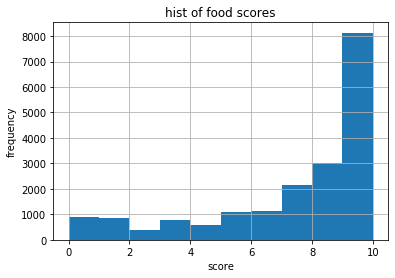

In [9]:
lemmatized["food"].hist()
plt.xlabel("score")
plt.ylabel("frequency")
plt.title("hist of food scores");

Можно заметить, что в целом, большинство отзывов положительные, и что про сервис заметно больше плохих отзывов.

In [11]:
normaltest(lemmatized["food"])

NormaltestResult(statistic=2446.6949827517105, pvalue=0.0)

In [12]:
normaltest(lemmatized["service"])

NormaltestResult(statistic=2243.367212416033, pvalue=0.0)

Ни одно из распределений оценок не распределено нормально (что довольно очевидно из гистограмм). Значит, следует использровать непараметрический тест.

In [13]:
wilcoxon(lemmatized["food"], lemmatized["service"])

WilcoxonResult(statistic=32386359.0, pvalue=5.312291041818588e-19)

p=5e-19, а значит выборки скоррелированы. К тому же, сила корреляции очень велика.

### **1.2. разметка тренировочного корпуса** (Ася)
Единственная разметка тренировочного корпуса состояла в том, что все тексты были проанализированы с помощью UDPipe. Переед обработкой из текстов бвли исклбчены знаки, которых нет в токенизаторе UDPipe: *, «». Также, все цифры были отделены от слов. Опечатки никак не обрабатывались. Размеченные данные доступны по ссылкам:
- [UDPipe parsed conllu files](https://drive.google.com/open?id=181szxLRYHorRrzGTcA1XwwA23MVy7F90)
- [UDPipe lemmatized and POS-tagged csv dataset](https://drive.google.com/open?id=1oqzArfz05A7Wecfs95FXPy1VyjU2tnkx)

Код парсинга xml доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/xml%20processing.ipynb). (Аня и Галя)

Код обработки UDPipe с помощью доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/udpipe_parsing.ipynb). (Ася)

Код предобработки для применения метода нейронных сетей доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/Sentiment_for_project_prepare_dataset.ipynb). (Галя)

### **1.3. использованные модели**
#### **1.3.1. word2vec**
В качестве векторной модели использовалась модель [ruscorpora_upos_cbow_300_20_2019](http://vectors.nlpl.eu/repository/11/180.zip) c сайта [RusVectores](https://rusvectores.org/ru/models/). Это word2vec cbow модель натренированная на [НКРЯ](http://www.ruscorpora.ru/) 2019 года. ~~Не было никаких особых причин выбрать именно эту модель)))~~
#### **1.3.3. wiki_ru_wordnet**
Русский аналог [wordnet](https://wordnet.princeton.edu/), данные которого взяты из метаразметки русской википедии. В проекте использовался питоновский пакет wiki_ru_wordnet.
#### **1.3.4. adagram**
[Adaptive ScipGram](https://github.com/lopuhin/python-adagram), а именно [модель (1.5Гб)](https://s3.amazonaws.com/kostia.lopuhin/all.a010.p10.d300.w5.m100.nonorm.slim.joblib), предложенную на семинаре.

### **1.4. дополнительные корпуса**
В качестве дополнительного корпуса была использована соотвествующая тренировочному корпусу по объёму часть [RuWac](https://www.sketchengine.eu/russian-web-corpus/), русского интернет-корпуса. Корпус доступен по [ссылке (9Гб)](http://corpus.leeds.ac.uk/tools/ru/ruwac-parsed.out.xz). Корпус был размечен с помощью UDPipe. Корпус был использован как нейтральный для выявления домен-специфичных слов при помощи метрики странности.

## **2. методы**


### **2.1. задание 1 (извлечение тонального словаря)**
Финальные версии словарей доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/final_food_scores.csv) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/final_service_scores.csv).

### **2.1.1. векторный метод** (Лера)
Метод описан в 21 главе [Jurafsky](https://web.stanford.edu/~jurafsky/slp3). Цель метода - отранжировать слова в порядке изменения полярности, от негативной к позитивной или наоборот. Метод опирается на векторы базовых слов каждой полярности (сиды). Создаются 4 эмбеддинга, которые будут предствлять репрезентацию сидов каждой полярности. Для этого считываются сиды - по каждой тематике отдельно. Затем для каждой тематики усередняются токены сидов для каждой полярности по формуле:
    $$V^+ = \frac{1}{n}\sum_{1}^n E(w_{i}^+)$$
    $$V^- = \frac{1}{m}\sum_{1}^m E(w_{i}^-)$$
Затем создаются "семантические оси" для каждой тематики по следующей формуле
    $$V_{axis} = V^+ - V^-$$
Итого, имеются две оси. Для каждого токена в корпусе высчитывается косинусная близость с данной осью - чем ниже близость, тем более положительно поляризовано слово. Таким образом, можно отранжировать все токены в порядке увеличения положительности полярности.

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/semantic_axis.ipynb).

Первичные списки с близостями доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/semantic_axis_method/food.csv) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/semantic_axis_method/service.csv).

### **2.1.2. CNN метод** (Галя)
Метод из [семинара 7](https://github.com/sjut/HSE-Compling/blob/master/seminars/7_Sentiment.ipynb) по статье [Arras et al. 2017](http://www.aclweb.org/anthology/W16-1601). Метод заключается в применении конволюционных нейронных сетей с задачей бинарной классификации отзыва как положительного или отрицательного. Далее веса признаков (слов) использовались как "положительность" слов. При этом веса признаков учитывались только для случаев, где модель делала верное предсказание. Веса суммировались по всему корпусу. 

Для того, чтоб создать различные списки для различных аспектов, в качестве таргет-оценок подавались оценки соответствующие каждому аспекту в отдельности, а не усреднённые оценки. 

Метод применялся к частям датасета (по 2000 отзывов), поскольку большее число текстов перегружало оперативную память (25Гб). Метод для сервиса удалось применить только к первым 16000 отзывов.

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/Sentiment_for_project_refactor.ipynb)

Полученные списки с предсказательной силой в модели CNN доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/CNN/sent_food.pickle) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/CNN/sent_service.pickle).

### **2.1.3. метод графа** (Ася)
Метод из статьи [Dubatovka et al](http://www.dialog-21.ru/media/3388/dubatovkaaetal.pdf). Краткое описание метода можно найти в [реферате](https://github.com/AnnaZhuravleva/avtobreja/blob/master/referat.pdf). В нашей реализации есть несколько отличий:

*   Граф построен не только на прилагательных, но и на наречиях.
*   Поиск целевых конструкций (сочинения и противопоставления) был осуществлен не по текстовому шаблону, а по синтаксическому дереву, порождённому UDPipe.

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/udpipe_parsing.ipynb) (раздел "Расширение списка сидов при помощи графа").

Полученное разбиение на списки в графе доступно по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/food_sentiment.csv) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/service_sentiment.csv). Оптимизация разбиения проходила по оценке списков, описанной ниже в пункте 2.1.6.

### **2.1.4. комбинирование методов** 
Сначала были усреднены 4 списка для каждой тональности, полученные с помощью CNN. Кроме того, они были z-нормированы. После этого они были усреднены с z-нормированым векторным методом, домноженным на 5 для уровнивания порядков. В результате был получен единый список "положительности" слов. Верхние 1% были отмечены как положительная тональность, нижние 1% - как отрицательная.

Код усреднения методов векторов и CNN доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/semantic_axis.ipynb). (Лера)

Комбинированные списки, обрезанные по 5%, доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/total_CNN%2BSAM/food.csv) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/total_CNN%2BSAM/service.csv).
Комбинированные списки без обрезания весов доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/total_CNN%2BSAM/full_food_wo_mark.csv) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists/total_CNN%2BSAM/full_service_wo_mark.csv).

Все конфликты метода графа и комбинации методов векторов и CNN были разрешены вручную. В списке еды было обнаружено 20 конфликтов, в списке сервиса - 30.  Во всех случаях, кроме 1 ошибки в еде, метод графа выдал правильную оценку, а комбинация методов - неправильную. (Финальные списки)

Код комбинирования методов достпуен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/crop_at_1_.ipynb). (Галя) 

#### **2.1.5 добавление би- и три- грамм** (Аня)
Были собраны синтаксические би- и три- граммы с корнями прилагательными (20.6тыс), существительными (86.6тыс), глаголами (9тыс), словом "не" (627) и  словом "нет" (143). После этого они были отфильтрованы по частоте (взяты самые частотные 10%). Каждое слово, кроме "не" и "нет" было взвешено в соответствии с усреднённым весом, полученным в результате комбинации метов векторов и CNN. Веса слов складывались. Если в n-грамме было отрицание ("не" или "нет"), вес умножался на -1.

Веса брались отдельно для каждого из аспектов. Так получилось два списка с различными весами. После этого были взяты 1% самых "положительных" и 1% самых "отрицательных" n-грамм для каждого аспекта. Они были отмечены 1 и 0 соответственно, и добавлены к существующим тональным словарям.

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/synt_3grams/corpus.py).

Полученные списки весов би- и три- грамм доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/synt_3grams/food_trigrams.csv) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/synt_3grams/service_trigrams.csv).

#### **2.1.6 Оценка полученных списков** (Ася)

Чтобы проверить, насколько адекватны полученные результаты, была использвана  простая метрика. Слова с приставкой "не" и без такой приставки обычно противоположны по смыслу, например: красивый — это положительная оценка, а некрасивый — отрицательная. Соответственно, если такие слова вдруг совпадают по оценке, то это как минимум подозрительно. Метрика показывает, какой процент таких пар в списке размечен в один класс. Разумеется, стопроцентного попадания быть не может, так как семантика отрицания не так проста :)

Полученные результаты можно увидеть [здесь](https://github.com/AnnaZhuravleva/avtobreja/blob/master/udpipe_parsing_and_graph.ipynb) (Раздел "Оценка результатов").

### **2.2. задание 2**

#### **2.2.1. извлечение слов-ключей**

##### **2.2.1.1. ручная разметка** (Галя)
Из тестовой выборки задания 2 были вручную извлечены слова, которые являлись индикаторами того или другого аспекта.

Списки доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/food_key.txt) (38 слов) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/service_key.txt) (15 слов).

##### **2.2.1.2. расширение ручной разметки** (Аня)
В каждом случае слова добавлялись в множество, чтобы избежать повторов.
- **word2vec**: для каждого слова были взяты десять ближайших соседей из модели.
- **wikiwordnet**: для каждого слова были взяты синонимы из синсета и их гипонимы.
- **adagram**: для каждого слова были взяты все "соседи" всех значений.

После этого было взято объединение слов, полученных методами word2vec и adagram, и пересечено со словами, полученными методом wikiwordnet. Несмотря на такую фильтрацию, качество получилось очень низкое.

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/word_lists_expanding.ipynb).

Списки, расширенные тезаурусом, доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/food_key_extended.txt) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/service_key_extended.txt).

##### **2.2.1.3. расширение методом CNN** (Галя)
В этом методе переиспользвался метод из [семинара 7](https://github.com/sjut/HSE-Compling/blob/master/seminars/7_Sentiment.ipynb). Для расширения списка ключей с помощью CNN в качестве таргет-оценок подавалась разметка того "о чём", тот или иной отзыв. Разделение отзывов на тематику, основывалось на предположении, что если в отзыве оценка условно 0 за сервис и 8 за еду то отзыв про сервис. Если  оценки близки, то не понятно, о чём отзыв, и он не был включён в выборку.

Отзывов, где за оба оценка 10 - 17%. Отзывов, где обе оценки выше или равны 57 - 58%.

Отзывов, где за оба оценка 0 - 0.5%, а где только одна оценка 0, а другая не 0 - 0.2%. Отзывов, где обе оценки ниже 4 - 11%.

Итак, были взяты отзывы, где одна оценка выше или равна 7, а другая ниже или равна 4. Таких было 10% (около 2тыс). Отзыву присваивалась "тематика" низкой оценки.

Результаты получились плохими, так как, видимо, предположение о тематике отзывов было неверно :)

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/Aspect_separation.ipynb).

Близость слов к аспекту еды, оцененная этим методом, доступна по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/aspect.pickle).

##### **2.2.1.4. расширение с помощью извлечения домен-специфичных слов и их кластеризации** (Лера)
Сначала были извлечены домен-специфичные слова по метрике странности, при помощи сравнения тренировочного корпуса с нейтральным (фрагментом RuWac, равным по размеру нашему корпусу).То есть слова, которые редки в нейтральном корпусе, но часты в тренировочном. Были взяты 700 наиболее маркированных токенов.

После этого домен-специфичные слова были преобразованы в вектора модели word2vec и нормализованы (поскольку все они имеют сходную тематику, что могло бы негативно сказаться на качестве кластеризации).

Наконец, вектора были кластеризованы вокруг центроидов вручную размеченных ключей аспектов. К какому кластеру они были отнесены, к такому аспекту их и отнесли.

Тем не менее, кластеризация не удалась - по тематике еды было показано приемлемое качество, но в списке сервиса было много названий еды. Скорее всего, это связано с тем, что в целом в выборке значимых токенов по теме еды было намного больше вхождений, чем по теме сервиса. Также по теме сервиса было меньше вручную размеченных ключей.


Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/blob/master/key_extention.ipynb).

Списки, расширенные векторно, доступны по ссылкам: [еда](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/super_extended_food_keys.txt) и [сервис](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/super_extended_service_keys.txt).

#### **2.2.2. использование словарей и ключей** (Аня)
Идея за использованием ключей состоит в следующем: если тональное слово синтаксически сочетается со словом из ключа аспекта - оно относится к этому аспекту (может быть разом несколько аспектов, например, "и кухня и обслуживание очень плохие"). В итоге, в качестве ключей использовлись список для еды, полученный векторно, [объединённый](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/final_food_keys.txt) со списком, полученным тезаурусно, и [список для сервиса, полученный тезаурусно](https://github.com/AnnaZhuravleva/avtobreja/blob/master/seeds/service_key_extended.txt).

По всем синтаксическим тетра-граммам, проверяется есть ли среди них какое-то подмножество, входящее в один из наших двух списков. Если оно входит только 1 список аспектов, его аспект - название списка, его оценка - оценка из этого списка. Если слово входит в оба тональных списка, то необходимо смотреть на то, с чем связана эта три- би- грамма или слово внутри тетра-граммы.

Для n-грамм с вершиной-прилагательным, ключом являлась вершина, к которой оно относится. Для n-грамм с вершиной-глаголом, ключоми являлось существительное, не входящее в н-грамму, и принадлежащее той же вершине.

Если слово-ключ, с которым была синтаксически связана n-грамма, входит в список ключей только одного из аспектов, то оценка берётся из этого аспекта, и ей назначается этот аспект. Если ключ также входит в оба списка ключей-аспектов, 
то присваивались обе оценки и оба аспекта.

Код доступен по [ссылке](https://github.com/AnnaZhuravleva/avtobreja/tree/master/task_2)

* там же лежат образцы выдачи

## **3. Проблемы**

1. К сожалению, из-за отсутствия тестового корпуса, мы не можем предоставить количественные результаты и проанализировать ошибки, которые алгоритмы совершают в реальных условиях.
2. Мы использовали лемматизацию UDPipe (модель russian-syntagrus-ud-2.4-190531.udpipe), и она оказалась далека от совершенства. Ошибки довольно странные и влияющие на результаты (например, слова *кухня* и *вкусно* - это глаголы, а *овощи* превращаются в номинализацию от глагола "овостить".
3. Список сидов, предложенный в условии задания, был небольшим и несбалансированным (отрицательных тональных было сильно меньше, чем положительных) — это потребовало дополнительной работы и крайне негативно сказалось на качестве расширенного списка.

### **3.1. качество словарей**
1. Тональные словари, полученные нами при помощи нескольких методов (векторный, метод графа, CNN), были не очень высокого качества (вероятно, это связано с описанными выше проблемами).

2. Проблемы в качестве CNN можно отдельно объяснить тем, что оценки за еду и сервис очень сильно скореллированы. Из-за этиого почти любое слово, относящееся к сервису, является хорошим предсказанием оценки еды, и наоборот. Из-за этого списки очень похожи, и многие слова, которые должны бы входить только в один список, например *вкусный*, входят в оба.

3. Мы попробовали комбинировать методы. Тем не менее, после комбинирования методов CNN и векторов, многие оценки все еще были ошибочны: *понравиться* и *вкусный* - это плохо, а вот *травмоопасный*, *неухоженный*, *сумасшедший*, *пагубный*, *издевательский*, *противность* и *давка* - это отлично. ~~насчёт *сумасшедший*, я, может, даже согласна~~

4. Метод графа помог улучшить качество, но не очень сильно.

5. При комбинировании методов не очень понятно, в какой пропорции это делать (решениям какого метода приписывать больший вес, на каком месте стоит обрезать списки, например, 1% или 5%). Эти гиперпараметры нам помог бы определить тестовый датасет.

### **3.2. извлечение ключей (слов, которые помогали бы понять, к какому аспекту относится оценка)**
1. Извлечение большого количества хороших ключей вручную — это трудное занятие.

2. CNN не сработало, потому что предположение, которое мы сделали (что некоторые отзывы можно целиком приписать к какому-то одному аспекту, подробнее см. выше) было неверное. Кроме того, использование CNN требует дополнительной настройки.

3. Мы попытались расширить число тегов с помощью тезаурусов, но получили много шума. Минус тезаурусов — нет широкого контекста, и поэтому значения определяются не очень качественно.

4. Кластеризация по векторам получилась плохо даже после дополнительного отбора из выделенных кластеров наиболее ближаших к центроидам элементов кластеров. По теме еды токены по большей части были кластеризованы верно, а по теме сервиса - совсем нет. Скорее всего, это связано, во-первых, с выраженным превалированием слов по тематике еды среди домен-специфических токенов. Во-вторых, есть предположение, что ключи по тематике сервиса в целом были подобраны не очень хорошо, так как расстояние от центроида по ручным ключам до ближайшего эмбеддинга для еды в два с половиной раза ниже, чем соответствующие до центроида сервиса. То есть, в кластер лексики по сервису в целом определялись довольно далекие от центроида токены.

5. Возможно, поиск аспектных слов (ключей) — это не самая удачная идея для такой задачи в целом.
